In [1]:
from google.colab import files
upload = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
Data=pd.read_csv("Mall_Customers.csv")

**K Means Algorithm**

In [3]:
df=Data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

**ELBOW METHOD - Finding optimal k values**

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = [] #within - cluster sum of square

for k in range(1,11):
  kmeans=KMeans(n_clusters = k,random_state=42)
  kmeans.fit(X_sc)
  wcss.append(kmeans.inertia_)

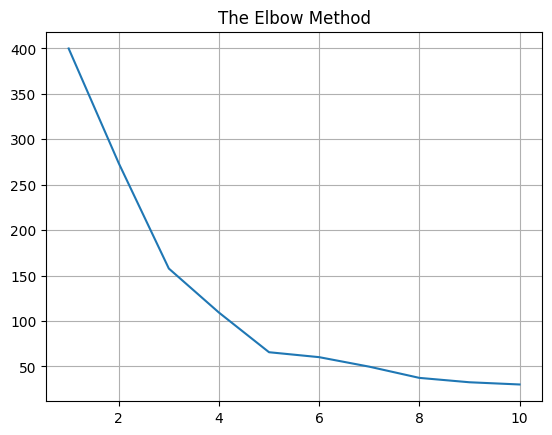

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.grid(True)
plt.show()

In [10]:
kmeans=KMeans(n_clusters = 5,random_state=42)
model_cluster = kmeans.fit_predict(X_sc)
df["Cluster"]=model_cluster
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


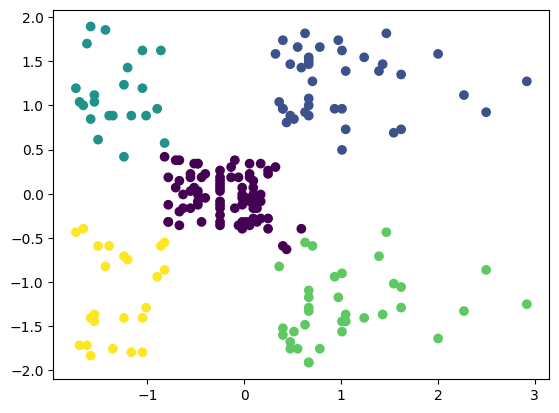

In [11]:
plt.scatter(X_sc[:,0],X_sc[:,1],c=model_cluster)
plt.show()

**PCA - PRICIPLE COMPONENT ANALYSIS**

In [14]:
Data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [12]:
df2=Data  #KMeans+PCA
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [15]:
X=df2[['Annual Income (k$)','Spending Score (1-100)']]

In [16]:
pipe=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('kmeans',KMeans(n_clusters=5,random_state=42))])

In [17]:
pipe.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [18]:
labels=pipe["kmeans"].labels_

df2["cluster"]=labels

In [19]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,4


In [20]:
X_pca = pipe["pca"].transform(pipe["scaler"].transform(X))

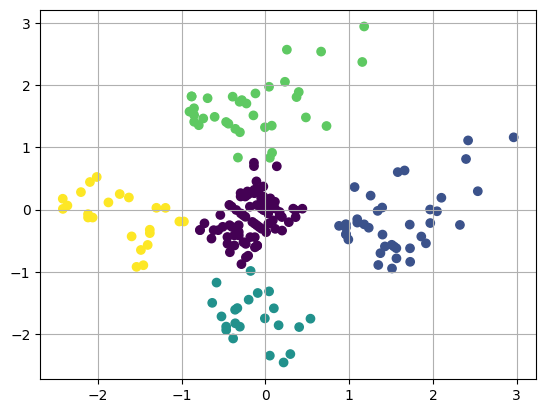

In [21]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)
plt.grid(True)
plt.show()